<a href="https://www.kaggle.com/code/smailceylan1/rule-based-customer-segmentation?scriptVersionId=234507565" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

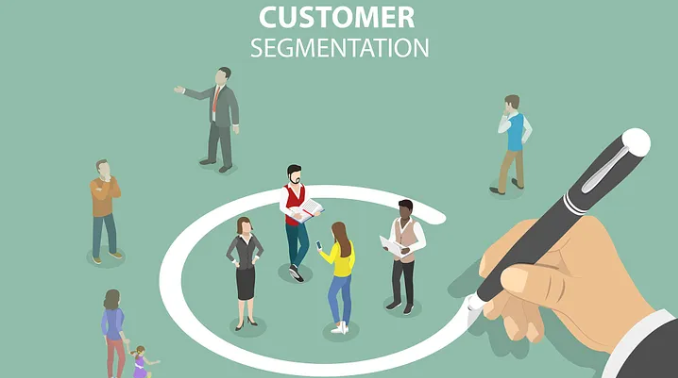
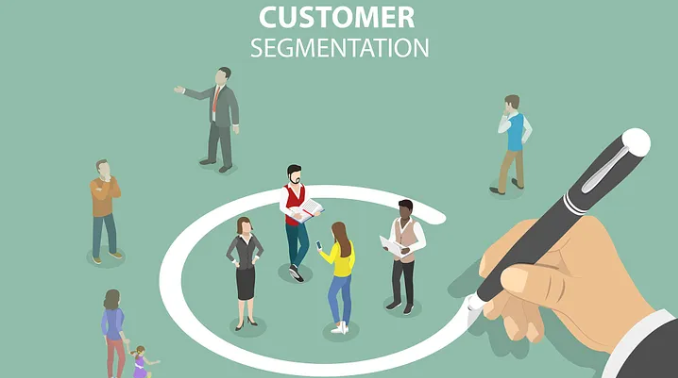

In the data-driven business world, understanding customer behavior and maximizing revenue potential is more critical than ever. Rule-based customer segmentation offers a simple yet powerful approach to identify distinct customer profiles by combining categorical variables such as age, gender, country, and device type.

The data set below belongs to a gaming company, and the gaming company wants to create new level-based customer definitions and segments based on these new customer definitions using some characteristics of its customers.

🧠 Objective
Our goal is to:

Create level-based personas by combining demographic features
Segment those personas based on their average revenue (PRICE)
Predict potential revenue from new users by identifying their segment
📁 Dataset Description
This dataset contains anonymized sales transactions from a mobile gaming company. Each record represents one sale and includes the demographic features of the user who made the purchase.

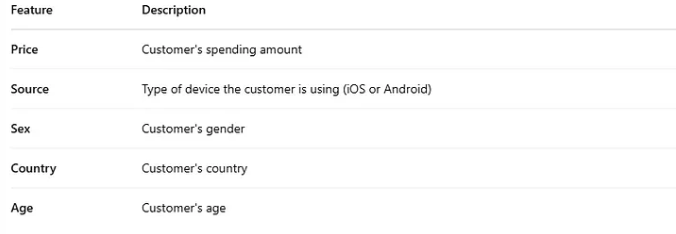

In [1]:
# import dataset

import pandas as pd
df = pd.read_csv('/kaggle/input/persona-dataset/persona.csv')
df.head()


,PRICE,SOURCE,SEX,COUNTRY,AGE
0,39,android,male,bra,17
1,39,android,male,bra,17
2,49,android,male,bra,17
3,29,android,male,tur,17
4,49,android,male,tur,17


In [2]:
# How many unique SOURCE are there? What are their frequencies?
df["SOURCE"].nunique()
df["SOURCE"].value_counts()

# How many unique PRICES are there?
df["PRICE"].nunique()

# How many sales were made at which PRICE?
df["PRICE"].value_counts()

# How many sales were there from each country?
df["COUNTRY"].value_counts()
df.groupby("COUNTRY")["PRICE"].count()

# How much was the total earned from sales by country?
df.groupby("COUNTRY").agg({"PRICE": "sum"})

# What are the PRICE averages according to SOURCE?
df.groupby("SOURCE").agg(mean_price=("PRICE", "mean")).reset_index()

# What are the PRICE averages in the COUNTRY-SOURCE breakdown?
df.groupby(["COUNTRY", "SOURCE"]).agg(mean_price=("PRICE", "mean")).reset_index()

# Average earnings by COUNTRY, SOURCE, SEX, AGE
df.groupby(["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).head()

# We sorted it from the largest to the smallest according to the PRICE variable
agg_df = df.groupby(["COUNTRY", 'SOURCE', "SEX", "AGE"]).agg({"PRICE": "mean"}).sort_values("PRICE", ascending=False)
agg_df.head()

,,,,PRICE
COUNTRY,SOURCE,SEX,AGE,
bra,android,male,46,59.0
usa,android,male,36,59.0
fra,android,female,24,59.0
usa,ios,male,32,54.0
deu,android,female,36,49.0


In [3]:
# Let's convert the names in the index to variable names
agg_df = agg_df.reset_index()
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE
0,bra,android,male,46,59.0
1,usa,android,male,36,59.0
2,fra,android,female,24,59.0
3,usa,ios,male,32,54.0
4,deu,android,female,36,49.0


In [4]:
# ##Converting AGE variable to categorical variable and assigning new variable as AGE_CAT
bins = [0, 18, 23, 30, 40, agg_df["AGE"].max()]
mylabels = ['0_18', '19_23', '24_30', '31_40', '41_' + str(agg_df["AGE"].max())]
agg_df["age_cat"] = pd.cut(agg_df["AGE"], bins, labels=mylabels)
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat
0,bra,android,male,46,59.0,41_66
1,usa,android,male,36,59.0,31_40
2,fra,android,female,24,59.0,24_30
3,usa,ios,male,32,54.0,31_40
4,deu,android,female,36,49.0,31_40


In [5]:
# We define a variable called customers_level_based and add it to the dataset.
agg_df['customers_level_based'] = agg_df[['COUNTRY', 'SOURCE', 'SEX', 'age_cat']].agg(lambda x: '_'.join(x).upper(), axis=1)
agg_df.head()

,COUNTRY,SOURCE,SEX,AGE,PRICE,age_cat,customers_level_based
0,bra,android,male,46,59.0,41_66,BRA_ANDROID_MALE_41_66
1,usa,android,male,36,59.0,31_40,USA_ANDROID_MALE_31_40
2,fra,android,female,24,59.0,24_30,FRA_ANDROID_FEMALE_24_30
3,usa,ios,male,32,54.0,31_40,USA_IOS_MALE_31_40
4,deu,android,female,36,49.0,31_40,DEU_ANDROID_FEMALE_31_40


In [6]:
agg_df = agg_df.groupby("customers_level_based").agg({"PRICE": "mean"}).reset_index()
agg_df.head()

,customers_level_based,PRICE
0,BRA_ANDROID_FEMALE_0_18,35.645303
1,BRA_ANDROID_FEMALE_19_23,34.077340
2,BRA_ANDROID_FEMALE_24_30,33.863946
3,BRA_ANDROID_FEMALE_31_40,34.898326
4,BRA_ANDROID_FEMALE_41_66,36.737179


In [7]:
### segmenting customer profiles
agg_df["SEGMENT"]=pd.qcut(agg_df["PRICE"],4,labels=["D","C","B","A"])
agg_df.head()

,customers_level_based,PRICE,SEGMENT
0,BRA_ANDROID_FEMALE_0_18,35.645303,B
1,BRA_ANDROID_FEMALE_19_23,34.077340,C
2,BRA_ANDROID_FEMALE_24_30,33.863946,C
3,BRA_ANDROID_FEMALE_31_40,34.898326,B
4,BRA_ANDROID_FEMALE_41_66,36.737179,A


In [8]:
# Classify new customers and estimate how much income they can bring.
new_user = "TUR_ANDROID_FEMALE_31_40"
agg_df[agg_df["customers_level_based"] == new_user]


,customers_level_based,PRICE,SEGMENT
72,TUR_ANDROID_FEMALE_31_40,41.833333,A
